In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Knee-project

/content/drive/.shortcut-targets-by-id/1V41lPa-_s_0gMaM6kaSDAUBVlOmIacX3/Knee-project


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import sys
import os
from tensorflow.keras.applications.nasnet import NASNetMobile
import keras
from numpy import load

from sklearn.model_selection import train_test_split
from keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [5]:
train_dir='/content/drive/MyDrive/Knee-project/train/'
test_dir='/content/drive/MyDrive/Knee-project/test/'

In [6]:
batch_size = 10
epochs = 6
img_height = 224
img_width = 224

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,target_size=(img_height, img_width))

Found 1650 images belonging to 5 classes.


In [8]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1650 images belonging to 5 classes.


In [9]:
 base_model = NASNetMobile(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))

19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.summary()

Model: "nasnet_mobile"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv1 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn1                  │ (None, 111, 111, 32)   │            128 │ stem_conv1[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_conv_1_stem_1   │ (None, 111, 111, 11)   │            352 │ activation[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reduction_bn_1_stem_1     │ (None, 111, 111, 11)   │             44 │ reduction_conv_1_stem… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 111, 111, 11)   │              0 │ reduction_bn_1_stem_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 111, 111, 32)   │              0 │ stem_bn1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 115, 115, 11)   │              0 │ activation_1[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_pad_red… │ (None, 117, 117, 32)   │              0 │ activation_3[0][0]     │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 56, 56, 11)     │            396 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_reducti… │ (None, 56, 56, 11)     │          1,920 │ separable_conv_1_pad_… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 56, 56, 11)     │             44 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv_1_bn_redu… │ (None, 56, 56, 11)     │             44 │ separable_conv_1_redu… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 11)     │              0 │ separable_conv_1_bn_r… │
├──────────────────────

 Total params: 4,269,716 (16.29 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,269,716 (16.29 MB)

In [12]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(1024, activation='elu'))
classifier.add(Dense(512, activation='swish'))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(5,activation='sigmoid'))
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ nasnet_mobile (Functional)           │ (None, 7, 7, 1056)          │       4,269,716 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      52,986,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,914,009 (220.92 MB)

 Trainable params: 53,644,293 (204.64 MB)

 Non-trainable params: 4,269,716 (16.29 MB)

In [13]:
classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
history = classifier.fit(train_data_gen, epochs=10,validation_data= val_data_gen,)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.9496 - loss: 0.0590 - val_accuracy: 0.9521 - val_loss: 0.0616
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9173 - loss: 0.0887 - val_accuracy: 0.9794 - val_loss: 0.0284
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.9889 - loss: 0.0160 - val_accuracy: 0.9703 - val_loss: 0.0454
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9705 - loss: 0.0344 - val_accuracy: 0.9758 - val_loss: 0.0298
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.9303 - loss: 0.0928 - val_accuracy: 0.9752 - val_loss: 0.0344
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.9615 - loss: 0.0396 - val_accuracy: 0.9630 - val_loss: 0.0526
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.9471 - loss: 0.0755 - val_accuracy: 0.8455 - val_loss: 0.1548
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.9212 - loss: 0

In [28]:
pip install Pillow

In [29]:
import numpy as np

# Use __next__() instead of next() to iterate through the generator
y = np.concatenate([val_data_gen.__next__()[1] for i in range(len(val_data_gen))])
true_labels = np.argmax(y, axis=-1)
prediction = classifier.predict(val_data_gen, verbose=2)
prediction = np.argmax(prediction, axis=-1)

165/165 - 15s - 89ms/step


In [30]:
import matplotlib.pyplot as plt

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [33]:
cm_plot_labels = ["Normal","Doubtful","Mild","Moderate","Severe"]

Confusion matrix, without normalization
[[503   0   0   0   0]
 [ 15 473   0   0   0]
 [  1   3 228   0   0]
 [  4   0   1 216   0]
 [  0   0   1   0 205]]
Accuracy: 0.985
Precision: 0.977
Recall: 0.985
F-Measure: 0.985


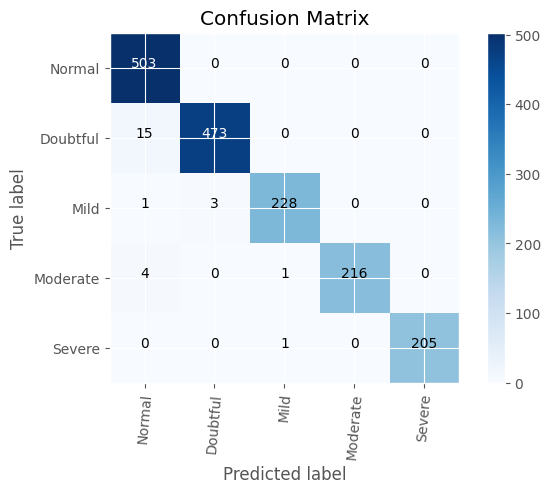

In [34]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction)
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[0,1], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred


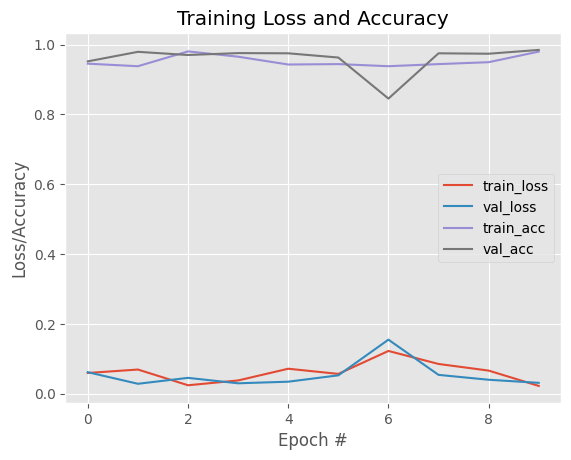

In [36]:
# plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
#plt.savefig("CNN_Model")

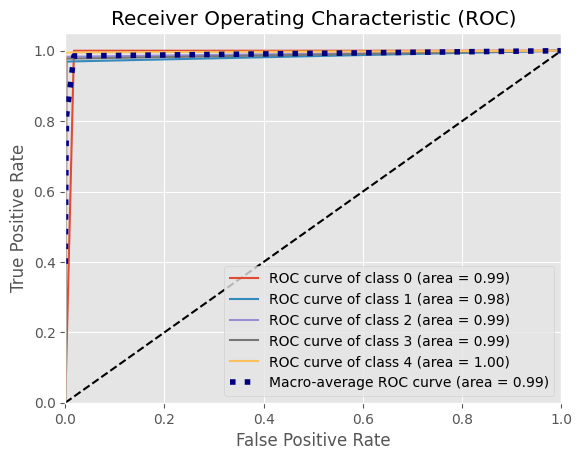

In [37]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'prediction' and 'true_labels' from your model

# Convert predictions to one-hot encoded probabilities
n_classes = 5  # Replace with the actual number of classes in your problem
prediction_probabilities = to_categorical(prediction, num_classes=n_classes)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels == i, prediction_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

macro_roc_auc = auc(all_fpr, mean_tpr)


# Plot ROC curves for all classes and macro-average
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot(all_fpr, mean_tpr, label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
# Assuming you have 'prediction' and 'true_labels' from your model
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

# Get the number of classes
num_classes = cm.shape[0]

# Calculate per-class accuracy
per_class_accuracy = []
for i in range(num_classes):
    class_accuracy = cm[i, i] / np.sum(cm[i, :])  # Correct predictions for class i / Total predictions for class i
    per_class_accuracy.append(class_accuracy)

# Print per-class accuracy
for i, accuracy in enumerate(per_class_accuracy):
    print(f"Accuracy for class {i}: {accuracy:.3f}")

Accuracy for class 0: 1.000
Accuracy for class 1: 0.969
Accuracy for class 2: 0.983
Accuracy for class 3: 0.977
Accuracy for class 4: 0.995


In [39]:
import os
save_path=os.path.join('/content/drive/MyDrive/Saved MODELS','NASNetMobile_Set_3.h5')
classifier.save(save_path)